In [107]:
import pandas as pd
train = pd.read_csv('train_titanic.csv')
test = pd.read_csv('test_titanic.csv')

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Selection

Feature selections and reasoning:
- **Pclass**: 1st, 2nd or 3rd class might've influenced the passenger's priority in getting a spot on a life raft to escape the ship.
- **Sex**: women more likely to get on life raft because of implicit gender stereotypes and moral beliefs/values in cultures.
- **Age**: Children might've been prioritized to get on a life raft for the same reason as women (morality/religious cultures).
- **SibSp**: larger groups of families may not have been able to all get on the life raft.
- **Parch**: same reasoning as above (families)
- **Fare**: relates to Pclass (lower, middle, higher class passengers may have been given/not given a seat on a life raft because of their socioeconomic status)
- **Embarked**: perhaps the people who got on at the earliest opportunity for embarkment (the first port) were able to locate the life rafts on the ship before the later passengers who embarked the Titanic days or weeks later at a different port.

Excluding: Cabin, Passenger ID and Ticket number because there is no information telling us how certain cabin or ticket numbers differ between passengers; as of right now, they are arbitrary numbers.

## Preprocessing

In [109]:
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare','Embarked']]
test1 = test[['PassengerId','Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare','Embarked']]

In [110]:
test1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [111]:
#fix nans in Embarked
#fix nans in Age
train = train.dropna()
test1 = test1.dropna()

In [112]:
#one hot encoding of categorical features: sex, embarked, 
for col in ['Sex', 'Embarked']:
    train = pd.get_dummies(train, columns=[col], prefix ='New', drop_first=True)
for col in ['Sex', 'Embarked']:
    test1 = pd.get_dummies(test1, columns=[col], prefix ='New', drop_first=True)

#normalize: age, fare, sibsp, parch, pclass
for col in ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']:
    train[col] = (train[col] - train[col].mean())/train[col].std()
    test1[col] = (test1[col] - test1[col].mean())/test1[col].std()

## Logistic Regression
- Type: Supervised learning (binary classification)
- Model family: Linear decision boundaries.
- Objective function: Cross-entropy, a special case of log-likelihood.
- Optimizer: Gradient descent.
- Probabilistic interpretation: Parametrized Bernoulli distribution.

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
logisticRegr = LogisticRegression()
y_train = train.Survived.to_numpy()
x_train = train.drop(columns=['Survived']).to_numpy()
logisticRegr.fit(x_train, y_train)

/Users/kristenflaherty/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
predictions_train = logisticRegr.predict(x_train)

In [116]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_train, predictions_train))

Accuracy:  0.8061797752808989


# Test on testing data

In [118]:
test1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,New_male,New_Q,New_S
0,892,1.013891,0.306194,-0.552436,-0.491376,-0.541461,1,1,0
1,893,1.013891,1.192431,0.590416,-0.491376,-0.555004,0,0,1
2,894,-0.167792,2.255916,-0.552436,-0.491376,-0.511111,1,1,0
3,895,1.013891,-0.225549,-0.552436,-0.491376,-0.527852,1,0,1
4,896,1.013891,-0.580044,0.590416,0.740786,-0.468647,0,0,1
...,...,...,...,...,...,...,...,...,...
409,1301,1.013891,-1.927125,0.590416,0.740786,-0.444353,0,0,1
411,1303,-1.349475,0.483441,0.590416,-0.491376,0.800573,0,1,0
412,1304,1.013891,-0.154650,-0.552436,-0.491376,-0.542346,0,0,1
414,1306,-1.349475,0.625239,-0.552436,-0.491376,1.109252,0,0,0


In [120]:
test_cases = test1.drop(columns=['PassengerId'])

In [122]:
predictions_test = logisticRegr.predict(test_cases)

In [125]:
predictions_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

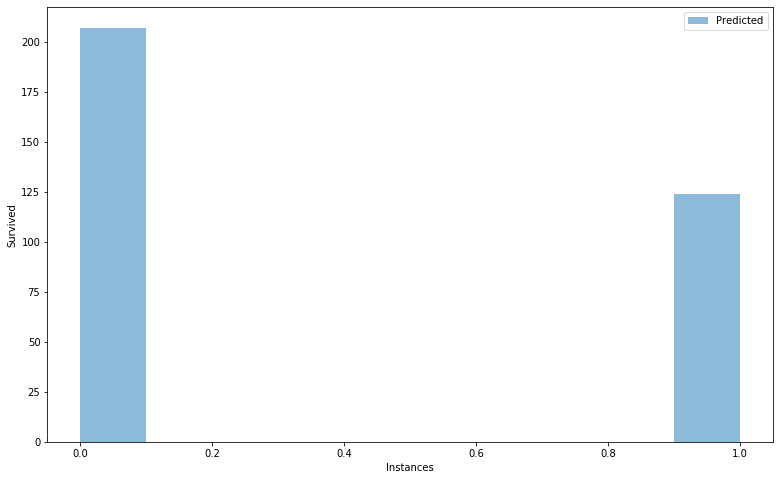

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize = (13,8))
plt.hist(predictions_test, label='Predicted', alpha=.5)
plt.xlabel('Instances')
plt.ylabel('Survived')
plt.legend()
plt.show()

In [126]:
dffinal = pd.DataFrame(columns=['PassengerId', 'Survived'])
dffinal['PassengerId'] = test1['PassengerId']
dffinal['Survived'] = predictions_test

In [127]:
dffinal

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
409,1301,1
411,1303,1
412,1304,1
414,1306,1


In [128]:
dffinal.to_csv('finaltitanic.csv', index=False)